# In Class Examples

In this first Notebook, I will follow along the examples provided in class to get a better understanding of where to focus my reconstruction part. 

## 1. Data Gathering

In [9]:
# Necessary installs
import sys
sys.version
!{sys.executable} -m pip install gitpython
!{sys.executable} -m pip install pyvis

In [10]:
# Folder to store the zeeguu repository
CODE_ROOT_FOLDER = "zeeguu_project/"

In [12]:
from git import Repo
import os

# Clone the repository to the parent directory
if not os.path.exists(CODE_ROOT_FOLDER):
  Repo.clone_from("https://github.com/zeeguu/api", CODE_ROOT_FOLDER)

In [13]:
# Avoid `zeeguu_project` prefix for every import
def file_path(file_name):
    return CODE_ROOT_FOLDER + file_name

assert (file_path("zeeguu/core/model/user.py") == "zeeguu_project/zeeguu/core/model/user.py")

In [31]:
# Extracting module names from the file paths
def module_name_from_file_path(full_path):
    file_name = full_path[len(CODE_ROOT_FOLDER):]
    file_name = file_name.replace("/__init__.py","")
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

assert 'zeeguu.core.model.user' == module_name_from_file_path(file_path('zeeguu/core/model/user.py'))

In [26]:
# Extracting imports using regular expressions
import re

def import_from_line(line):
    try:
        # ^ - start of the line
        # (?:from|import) - non-capturing group for either 'from' or 'import'
        # (\S+) - capturing group for one or more non-whitespace characters
        y = re.search("^(?:from|import) (\S+)", line)
        if y:
            return y.group(1)
    except:
        pass
    return None

# Extract all imports from a file
def imports_from_file(file):
    all_imports = []

    lines = [line for line in open(file)]

    for line in lines:
        imp = import_from_line(line)

        if imp:
            all_imports.append(imp)

    return all_imports

imports_from_file(file_path('zeeguu/core/model/user.py'))

['datetime',
 'json',
 'random',
 're',
 'sqlalchemy.orm',
 'zeeguu.core',
 'sqlalchemy',
 'sqlalchemy.orm',
 'sqlalchemy.orm.exc',
 'zeeguu.core.language.difficulty_estimator_factory',
 'zeeguu.core.model',
 'zeeguu.logging',
 'zeeguu.core.util',
 'zeeguu.core.model',
 'zeeguu.logging']

In [32]:
# Extract dependencies between all files
import pathlib
from pathlib import Path
import networkx as nx

def dependencies_graph(code_root_folder):
    files = Path(code_root_folder).rglob("*.py")

    G = nx.Graph()

    for file in files:
        file_path = str(file)

        module_name = module_name_from_file_path(file_path)

        if module_name not in G.nodes:
            G.add_node(module_name)

        for each in imports_from_file(file_path):
            G.add_edge(module_name, each)

    return G

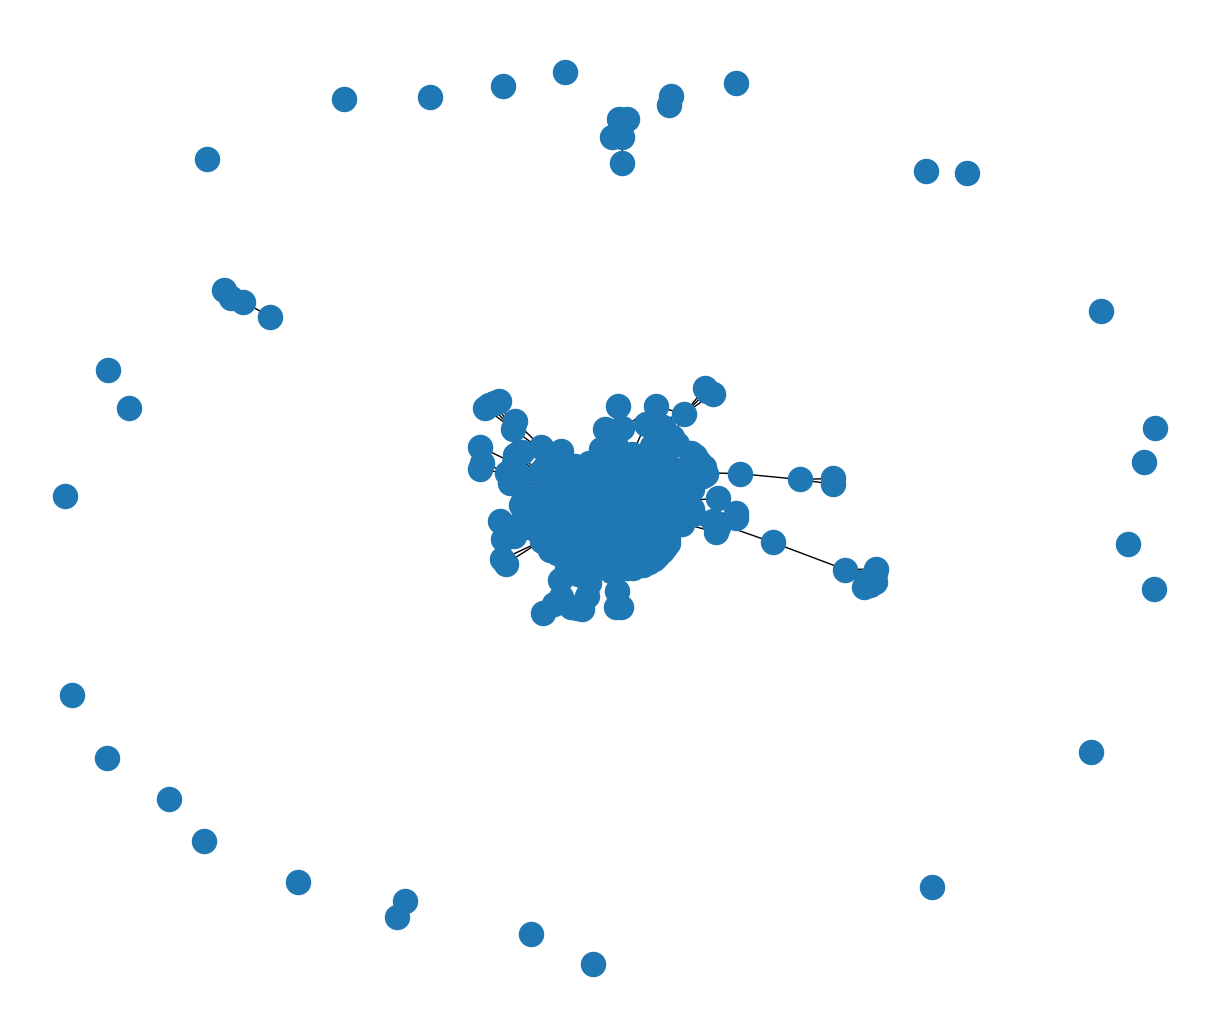

In [33]:
# Draw the graph
import matplotlib.pyplot as plt

def draw_graph(G, size, **args):
    plt.figure(figsize=size)
    nx.draw(G, **args)
    plt.show()

G = dependencies_graph(CODE_ROOT_FOLDER)
draw_graph(G, (12,10), with_labels=False)

## 2. Data Abstraction